## Load Libraries

In [1]:
import pandas as pd
from prophet import Prophet


## Load Data



In [6]:
df = pd.read_csv('../data/BeerConsumption.csv')

In [8]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [10]:
df.tail()

,date,beer
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130
323,12/1/2018,6370


### Format the Data

In [13]:
df.columns = ['ds','y']

In [15]:
df['ds'] = pd.to_datetime(df['ds'])

In [17]:
len(df) - 12


312

In [19]:
train = df.iloc[:312]
test = df.iloc[312:]

## Create and Fit Model

In [22]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(train)

22:16:36 - cmdstanpy - INFO - Chain [1] start processing
22:16:36 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

### Step 1: Create "future" placeholder dataframe



In [25]:
future = m.make_future_dataframe(periods=12,freq = 'MS')

In [27]:
future.tail()

,ds
319,2018-08-01
320,2018-09-01
321,2018-10-01
322,2018-11-01
323,2018-12-01



### Step 2: Predict and fill in the Future

In [30]:
forecast = m.predict(future)

In [32]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1784.320623,1173.568656,1484.203939,1784.320623,1784.320623,-451.654707,-451.654707,-451.654707,-451.654707,-451.654707,-451.654707,0.0,0.0,0.0,1332.665916
1,1992-02-01,1786.733533,1217.148969,1533.722145,1786.733533,1786.733533,-416.838240,-416.838240,-416.838240,-416.838240,-416.838240,-416.838240,0.0,0.0,0.0,1369.895292
2,1992-03-01,1788.990771,1446.638576,1761.749163,1788.990771,1788.990771,-183.454621,-183.454621,-183.454621,-183.454621,-183.454621,-183.454621,0.0,0.0,0.0,1605.536150
3,1992-04-01,1791.403681,1438.089687,1745.112717,1791.403681,1791.403681,-194.808243,-194.808243,-194.808243,-194.808243,-194.808243,-194.808243,0.0,0.0,0.0,1596.595439
4,1992-05-01,1793.738755,1688.648852,1992.637418,1793.738755,1793.738755,43.415232,43.415232,43.415232,43.415232,43.415232,43.415232,0.0,0.0,0.0,1837.153987


In [34]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
319,2018-08-01,4807.283378,4677.441276,5003.314015,4804.697874,4809.661196,35.725179,35.725179,35.725179,35.725179,35.725179,35.725179,0.0,0.0,0.0,4843.008557
320,2018-09-01,4822.797837,4545.117162,4861.705134,4819.784663,4825.918940,-118.072431,-118.072431,-118.072431,-118.072431,-118.072431,-118.072431,0.0,0.0,0.0,4704.725407
321,2018-10-01,4837.811830,4636.998729,4954.245675,4834.139171,4841.723565,-45.607304,-45.607304,-45.607304,-45.607304,-45.607304,-45.607304,0.0,0.0,0.0,4792.204527
322,2018-11-01,4853.326290,4732.395619,5048.844619,4848.564343,4858.071191,38.548919,38.548919,38.548919,38.548919,38.548919,38.548919,0.0,0.0,0.0,4891.875209
323,2018-12-01,4868.340283,5790.831435,6101.343383,4862.646153,4873.991939,1087.660046,1087.660046,1087.660046,1087.660046,1087.660046,1087.660046,0.0,0.0,0.0,5956.000329


In [36]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [38]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
312,2018-01-01,4260.726474,4107.244638,4418.950795
313,2018-02-01,4258.177153,4118.569469,4419.263043
314,2018-03-01,4519.083996,4377.071745,4669.911440
315,2018-04-01,4548.377187,4393.654128,4701.293313
316,2018-05-01,4798.690783,4636.269373,4950.638355
317,2018-06-01,4781.702568,4616.960777,4931.318144
318,2018-07-01,4928.757201,4765.282752,5086.403473
319,2018-08-01,4843.008557,4677.441276,5003.314015
320,2018-09-01,4704.725407,4545.117162,4861.705134
321,2018-10-01,4792.204527,4636.998729,4954.245675


### Plotting Forecast



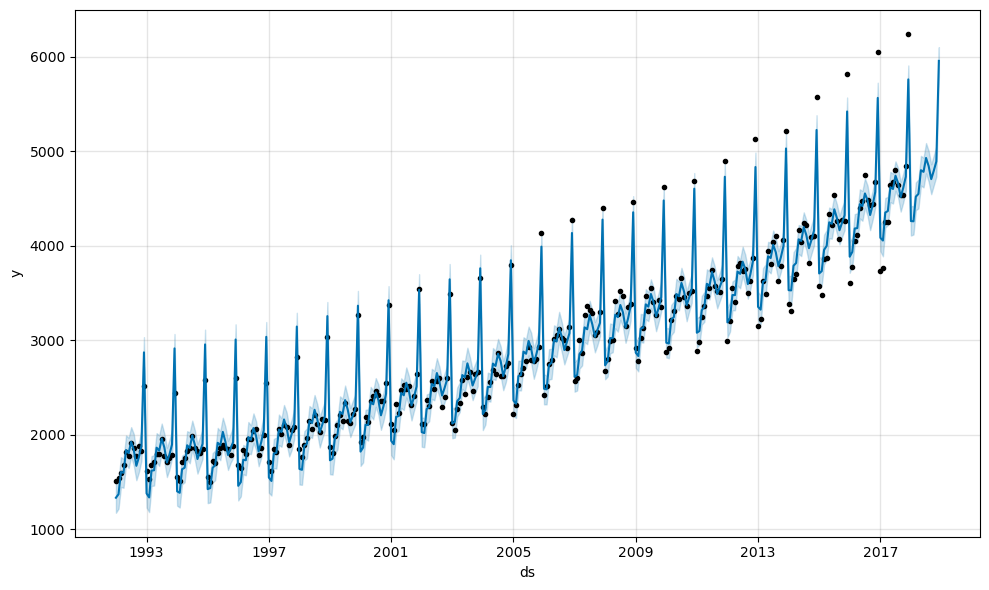

In [41]:
m.plot(forecast);

<Axes: xlabel='ds'>

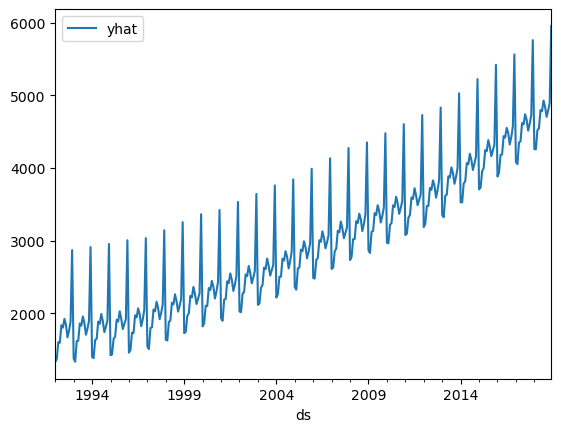

In [43]:
forecast.plot(x='ds',y='yhat')

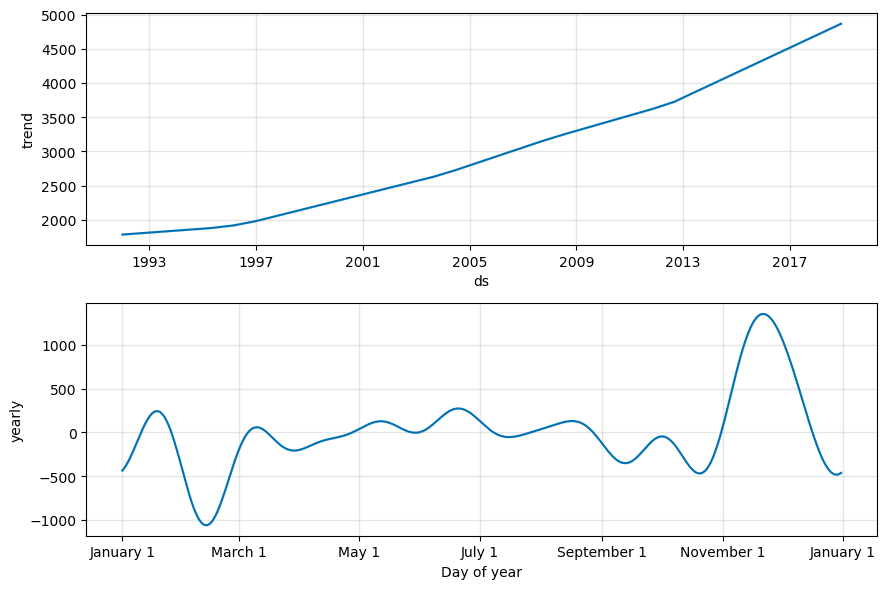

In [45]:
m.plot_components(forecast);


<Axes: xlabel='ds'>

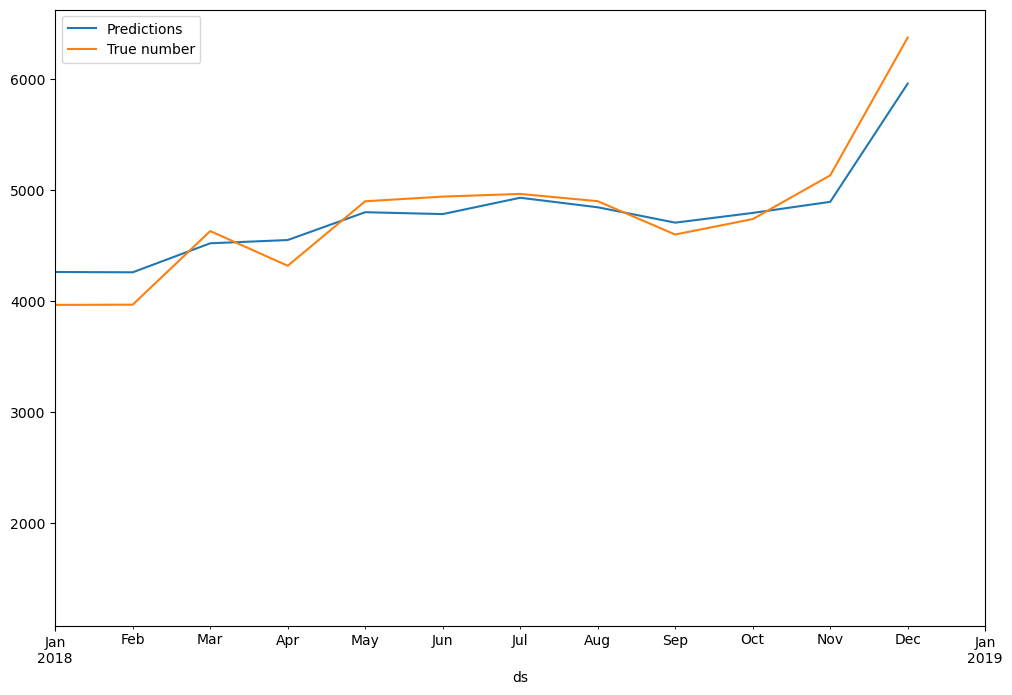

In [46]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True number',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))


### Step 3: Evaluate prediction

In [50]:
from statsmodels.tools.eval_measures import rmse

In [51]:
predictions = forecast.iloc[-12:]['yhat']


In [54]:
predictions


312    4260.726474
313    4258.177153
314    4519.083996
315    4548.377187
316    4798.690783
317    4781.702568
318    4928.757201
319    4843.008557
320    4704.725407
321    4792.204527
322    4891.875209
323    5956.000329
Name: yhat, dtype: float64

In [56]:
test['y']


312    3965
313    3967
314    4629
315    4317
316    4897
317    4939
318    4963
319    4898
320    4598
321    4737
322    5130
323    6370
Name: y, dtype: int64

In [58]:
rmse(predictions,test['y'])


207.96554610850842

In [60]:
test.mean()

ds    2018-06-16 12:00:00
y             4784.166667
dtype: object

### Prophet Diagnostics


In [63]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [64]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [65]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

  0%|          | 0/4 [00:00<?, ?it/s]

22:16:49 - cmdstanpy - INFO - Chain [1] start processing
22:16:49 - cmdstanpy - INFO - Chain [1] done processing
22:16:50 - cmdstanpy - INFO - Chain [1] start processing
22:16:50 - cmdstanpy - INFO - Chain [1] done processing
22:16:50 - cmdstanpy - INFO - Chain [1] start processing
22:16:50 - cmdstanpy - INFO - Chain [1] done processing
22:16:50 - cmdstanpy - INFO - Chain [1] start processing
22:16:50 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-01-01,2300.286696,2220.073920,2376.097649,2114,2001-12-05
1,2002-02-01,2251.191164,2174.283744,2323.830039,2109,2001-12-05
2,2002-03-01,2436.112605,2354.423692,2512.289313,2366,2001-12-05
3,2002-04-01,2469.976568,2394.385704,2542.098340,2300,2001-12-05
4,2002-05-01,2617.626381,2545.460956,2690.674722,2569,2001-12-05


In [68]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,31 days,66566.663676,258.005162,244.960528,0.084488,0.083728,0.080998,0.00
1,58 days,62945.562182,250.889542,233.936645,0.079313,0.074032,0.076204,0.00
2,59 days,59223.057942,243.357880,221.698644,0.074387,0.073378,0.071555,0.00
3,60 days,45939.498978,214.335016,176.709521,0.059054,0.058223,0.056939,0.25
4,62 days,33865.397030,184.025534,159.176035,0.054180,0.058223,0.052484,0.25
5,86 days,30039.759574,173.319819,141.156395,0.044733,0.039329,0.043479,0.50
6,87 days,28198.946937,167.925421,132.866906,0.040335,0.030533,0.039499,0.75
7,89 days,28603.903033,169.126884,136.031527,0.040785,0.030533,0.040039,0.75
8,90 days,6941.850283,83.317767,82.418597,0.025798,0.025977,0.025803,1.00
9,117 days,12935.914316,113.736161,107.384587,0.036865,0.026877,0.036321,0.75


C:\Users\anais\anaconda3\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\anais\anaconda3\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


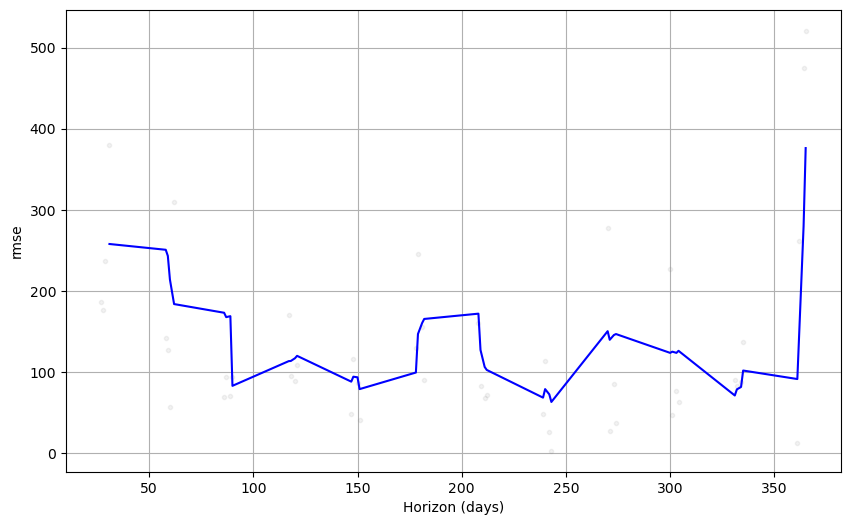

In [69]:
plot_cross_validation_metric(df_cv, metric='rmse');